In [1]:
# Importing libraries
import numpy as np
import pandas as pd

# Importing the visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the model building libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

# Importing the warning library
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the file
surprise_housing_df = pd.read_csv("train.csv")
surprise_housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Checking the basic information
surprise_housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Function to return columns with null values
def columns_with_missing_values():
    total = surprise_housing_df.isnull().sum().sort_values(ascending=False)
    percent = round(surprise_housing_df.isnull().sum()*100/len(surprise_housing_df), 2).sort_values(ascending=False)
    
    all_features = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    all_features = all_features[all_features.Total != 0]
    
    if len(all_features) == 0:
        return 'No Column with Missing Values.'
    return all_features
   
# Printing columns with null values
columns_with_missing_values()

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55


In [5]:
# Removing Meaningful Columns - NA means None
# List of columns with NA has a definition in the sheet
columns_with_meaningfull_null = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageCond", "GarageType", 
          "GarageFinish", "GarageQual", "BsmtFinType2", "BsmtExposure", "BsmtQual", "BsmtFinType1",
          "BsmtCond", "MasVnrType"]

for column in columns_with_meaningfull_null:
    before = surprise_housing_df[column].isnull().sum()
    surprise_housing_df[column].fillna("None", inplace=True)
    print(before, "missing values of", column ,"imputed.")

# Printing columns with null values
columns_with_missing_values()

1453 missing values of PoolQC imputed.
1406 missing values of MiscFeature imputed.
1369 missing values of Alley imputed.
1179 missing values of Fence imputed.
690 missing values of FireplaceQu imputed.
81 missing values of GarageCond imputed.
81 missing values of GarageType imputed.
81 missing values of GarageFinish imputed.
81 missing values of GarageQual imputed.
38 missing values of BsmtFinType2 imputed.
38 missing values of BsmtExposure imputed.
37 missing values of BsmtQual imputed.
37 missing values of BsmtFinType1 imputed.
37 missing values of BsmtCond imputed.
8 missing values of MasVnrType imputed.


,Total,Percent
LotFrontage,259,17.74
GarageYrBlt,81,5.55
MasVnrArea,8,0.55
Electrical,1,0.07


Removing Non Meaningful Columns

In [6]:
# List of columns where Median values can be imputed
columns_with_not_meaningfull_null = ["GarageYrBlt", "MasVnrArea"]

for column in columns_with_not_meaningfull_null:
    before = surprise_housing_df[column].isnull().sum()
    surprise_housing_df[column].fillna(surprise_housing_df[column].median(), inplace=True)
    print(before, "missing values of", column ,"imputed.")

# Printing columns with null values
columns_with_missing_values()

81 missing values of GarageYrBlt imputed.
8 missing values of MasVnrArea imputed.


,Total,Percent
LotFrontage,259,17.74
Electrical,1,0.07


In [7]:
# Dropping 'LotFrontage' Column
# Dropping column with a lot of missing values
surprise_housing_df.drop(columns=["LotFrontage"], inplace=True)

# Printing columns with null values
columns_with_missing_values()

,Total,Percent
Electrical,1,0.07


In [8]:
# Removing One Row - Electrical
# Removing one row with no straight forward imputation technique
surprise_housing_df.dropna(inplace=True)

# Printing columns with null values
columns_with_missing_values()

'No Column with Missing Values.'

## Data Analysis

In [9]:
# Making all continuous columns (integer and float) in one dataset 
surprise_housing_num_df = surprise_housing_df.select_dtypes(include=['float64', 'int64'])
print("Shape :", surprise_housing_num_df.shape)

surprise_housing_num_df.head()

Shape : (1459, 37)


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [10]:
# Dropping the 'Id' column
surprise_housing_num_df.drop(columns=["Id"], inplace=True)

In [11]:
# Target column name
sale_price_column = "SalePrice"

#### Plotting Numerical Columns

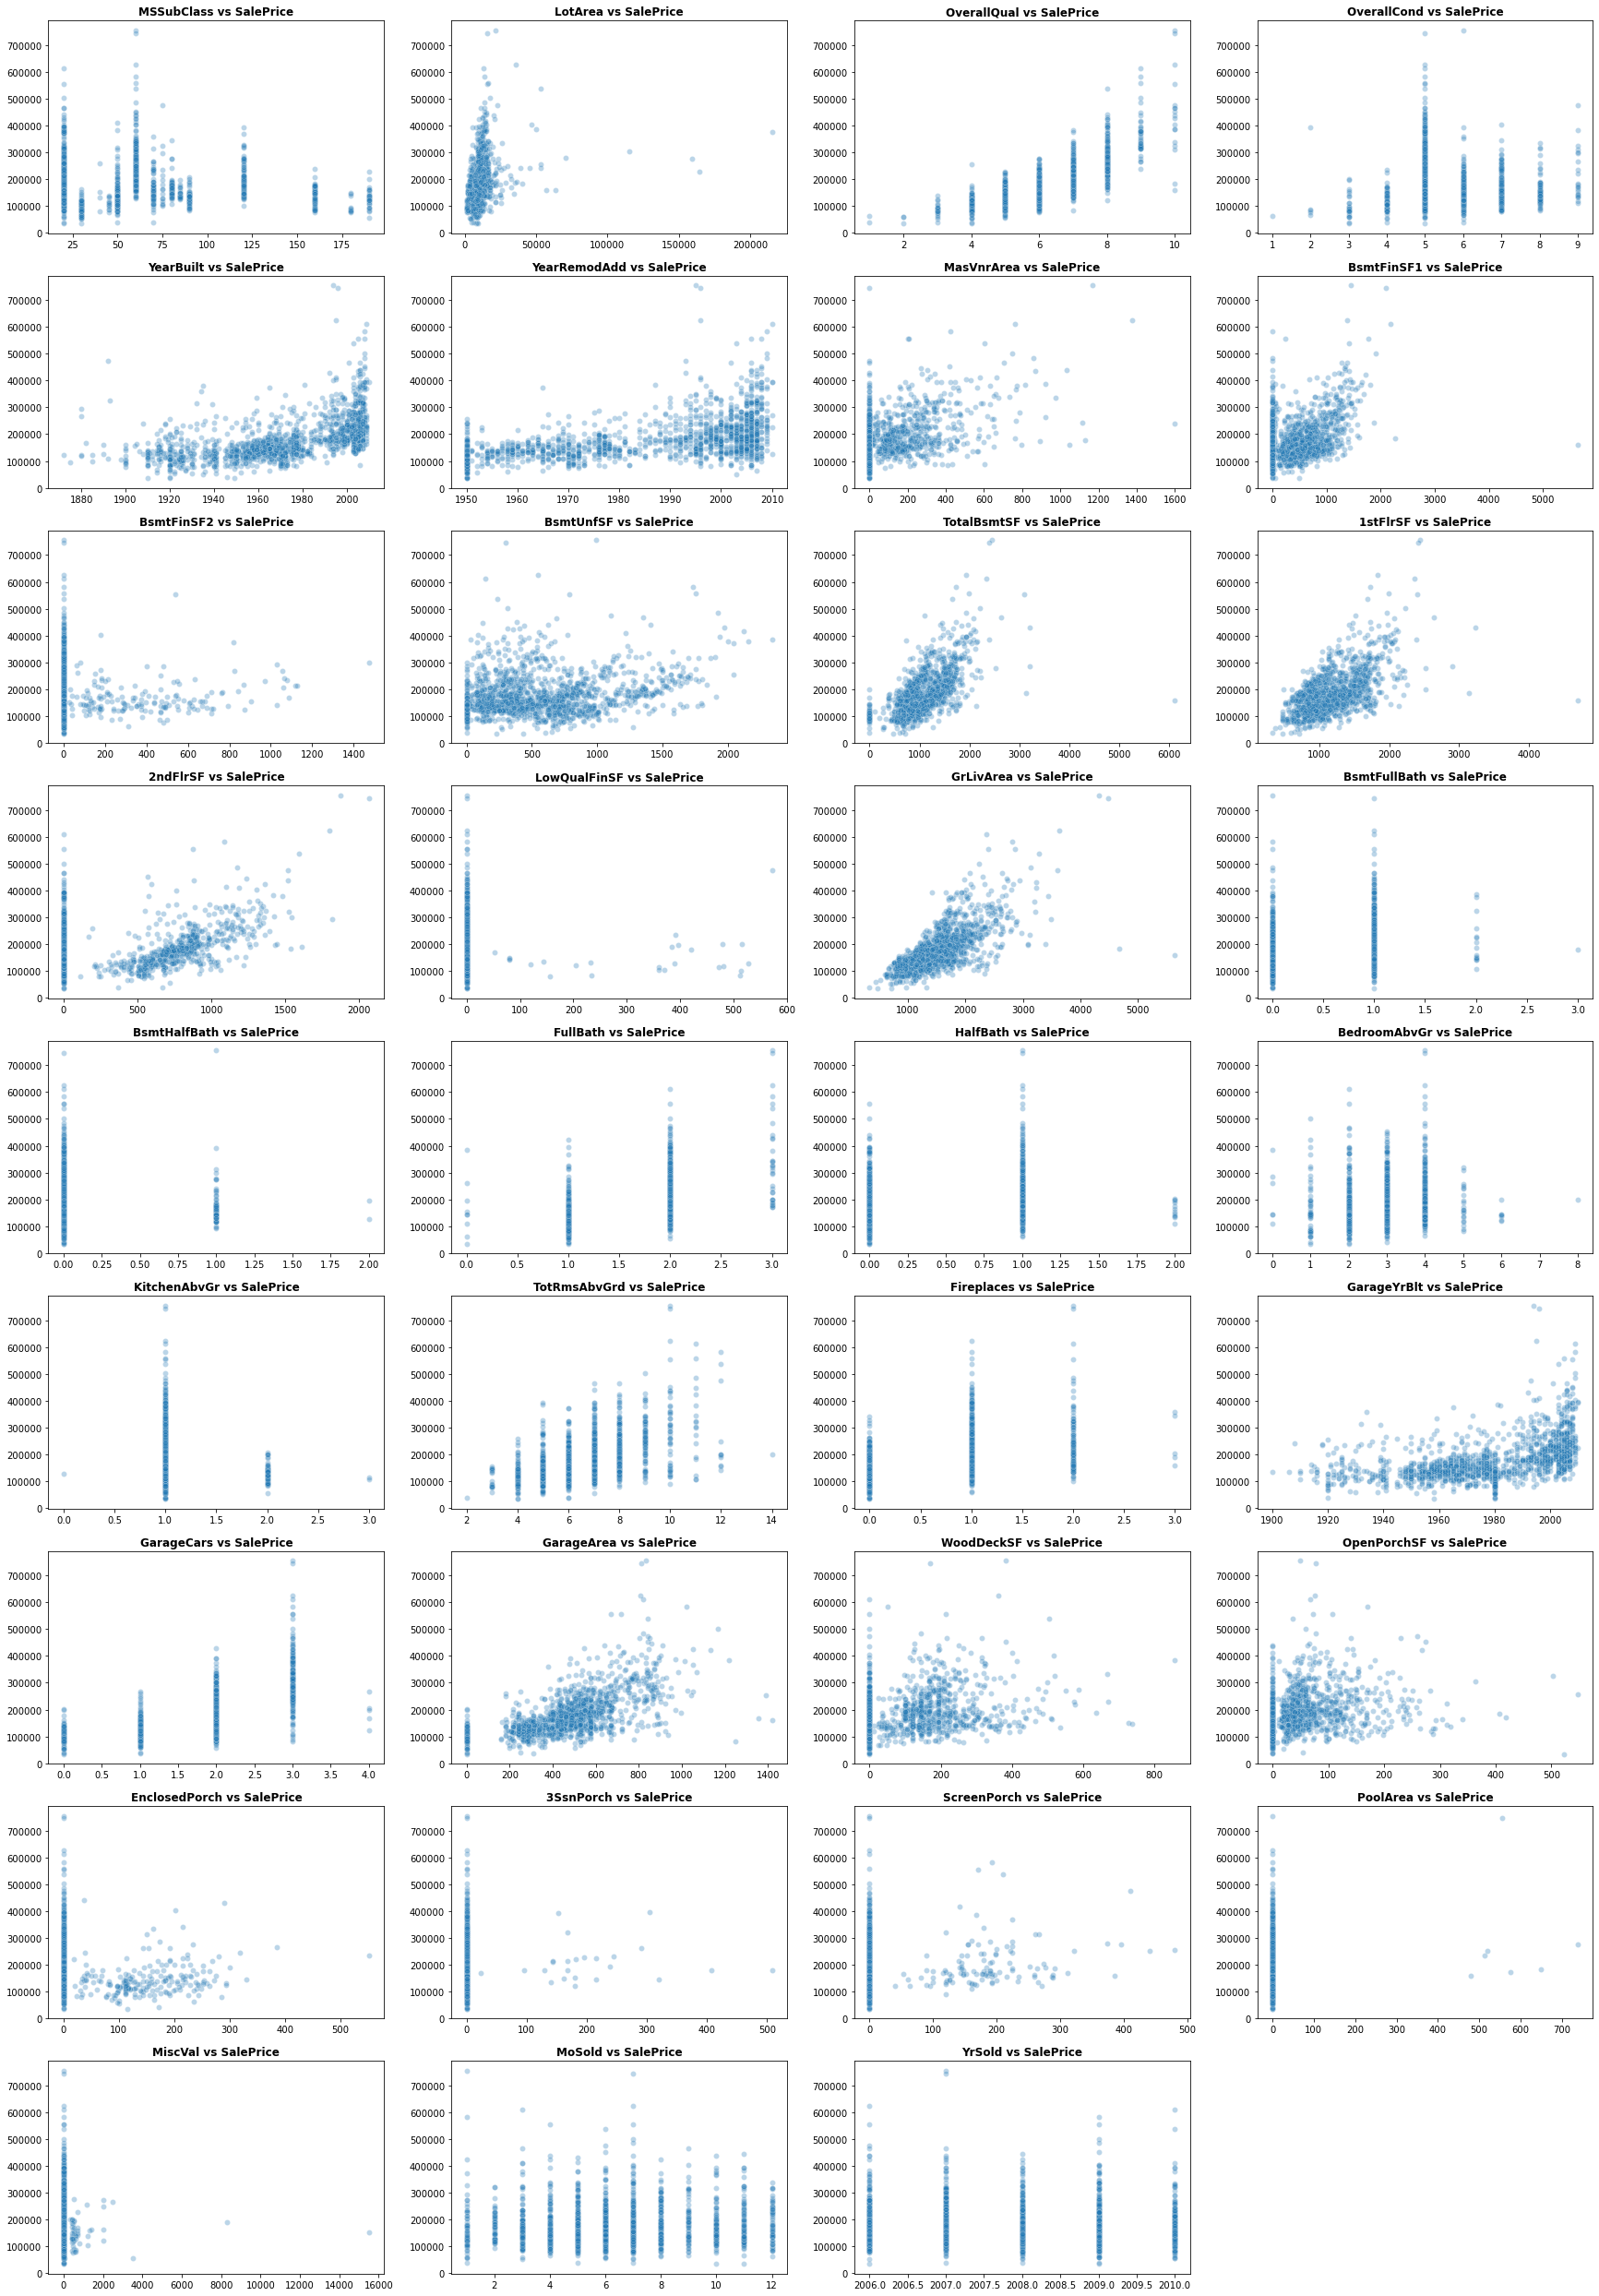

In [12]:
# Numerical column data analysis
plt.figure(figsize=(30, 50))

count = 1

for column in surprise_housing_num_df.columns:
    if column != sale_price_column:
        plt.subplot(10, 4, count)
        sns.scatterplot(surprise_housing_df[column], surprise_housing_df[sale_price_column], alpha = 0.3).set(ylabel=None, xlabel=None)
        plt.title(column + " vs " + sale_price_column, weight='bold')
        count += 1
    
plt.show()

### Plotting Correlation

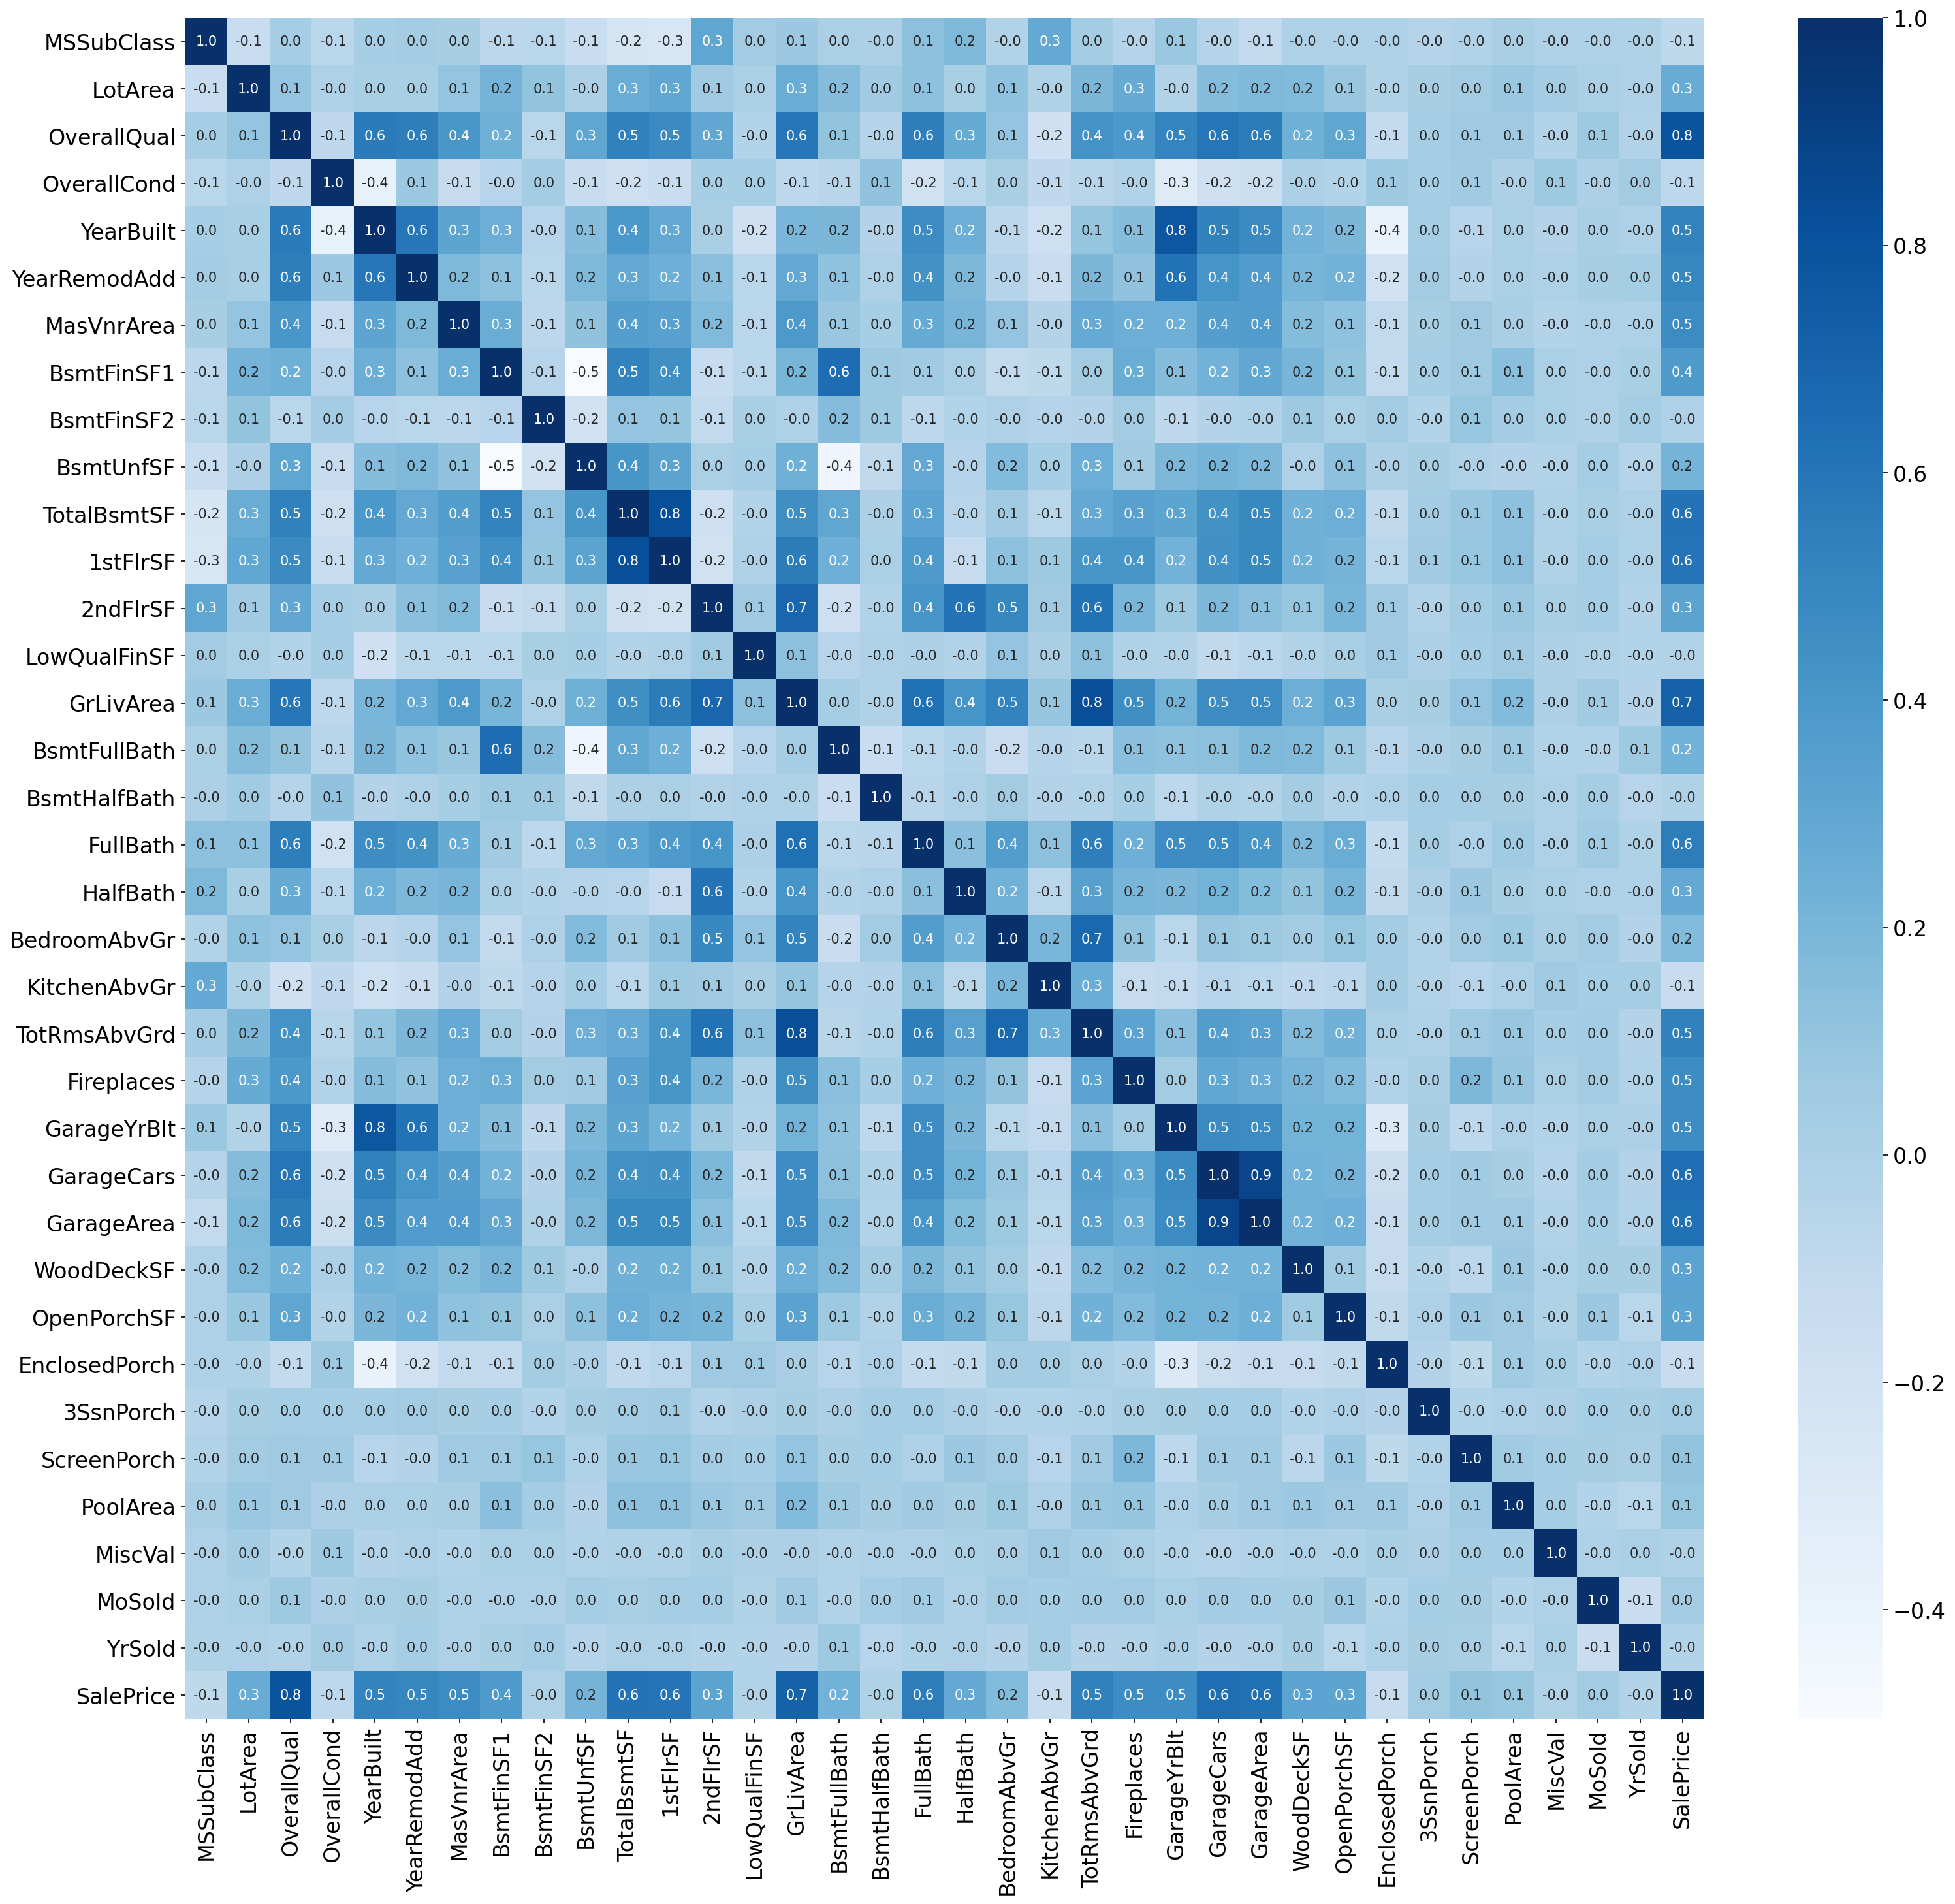

In [13]:
# Correlation graph
fig = plt.figure(figsize=(25,23),dpi=150)

plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

sns.heatmap(surprise_housing_num_df.corr(), annot = True, cmap="Blues",fmt='.1f')
plt.show()

In [14]:
# Making all categoric variables (object) in one dataset 
surprise_housing_obj_df = surprise_housing_df.select_dtypes(exclude=['float64', 'int64'])
print("Shape", surprise_housing_obj_df.shape)

surprise_housing_obj_df.head()

Shape (1459, 43)


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


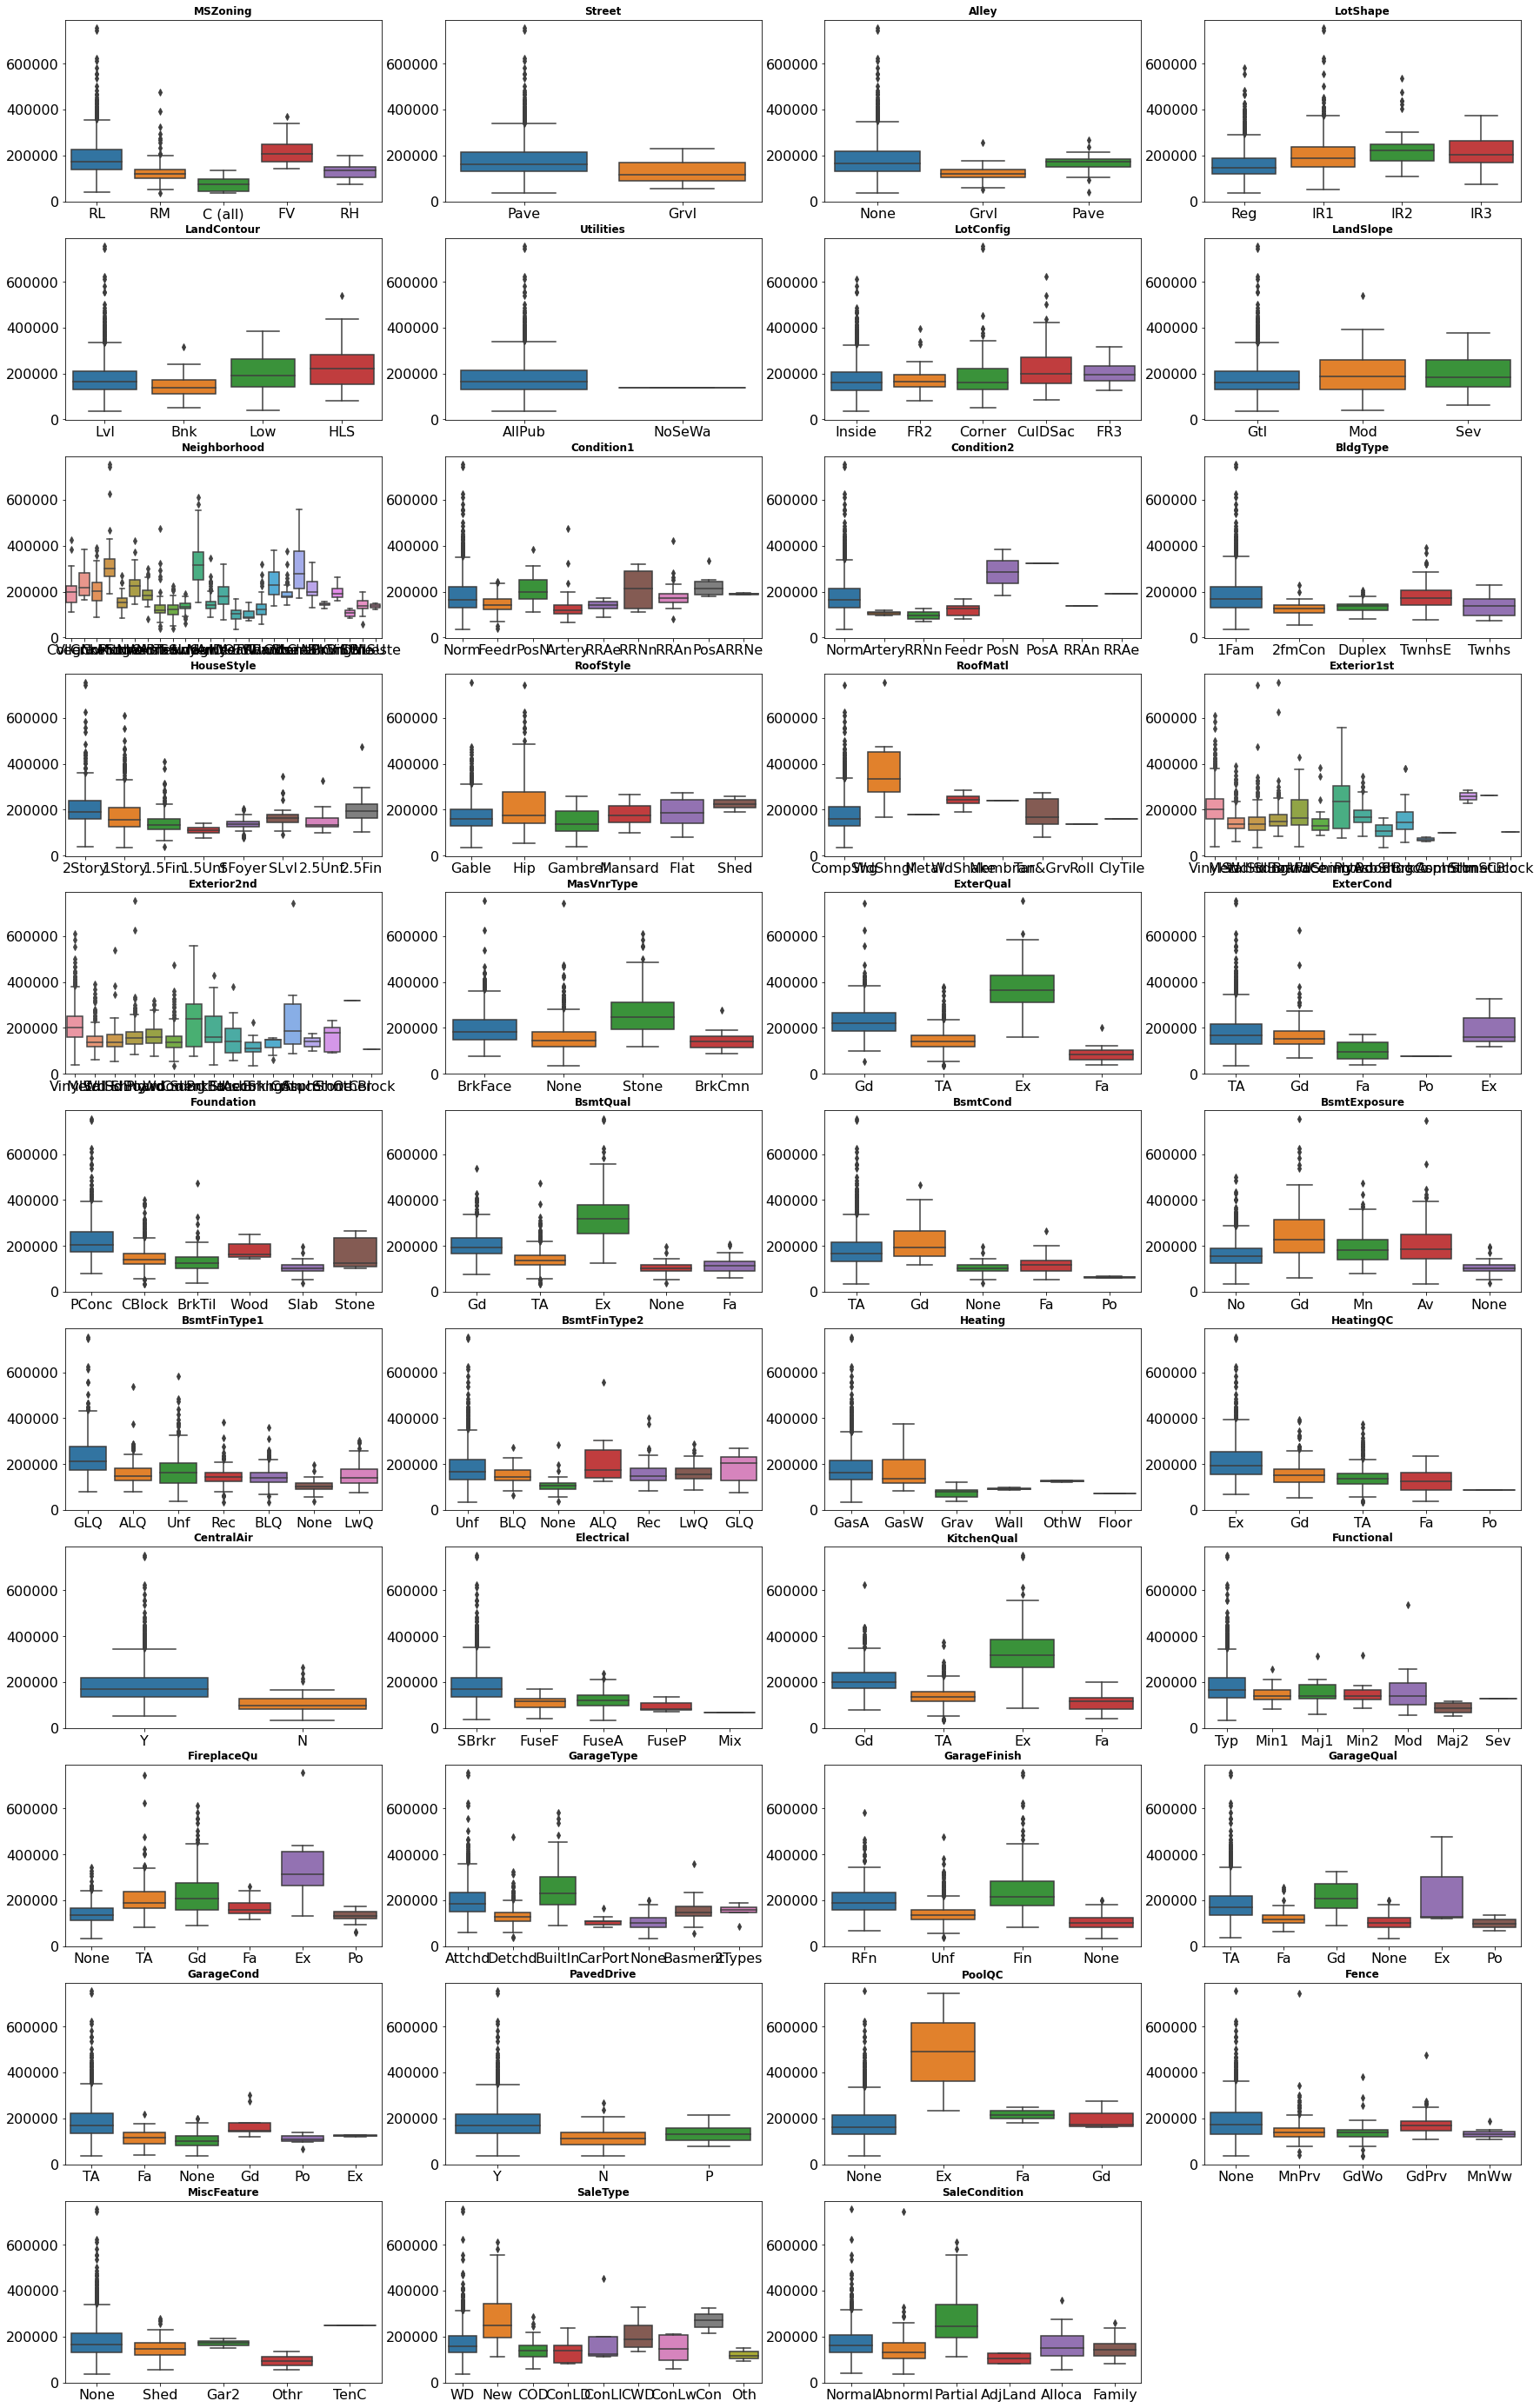

In [15]:
# Plotting Categorical Columns
# Categorical column data analysis
plt.figure(figsize=(30, 50))

count = 1

for column in surprise_housing_obj_df.columns:
    if column != sale_price_column:
        plt.subplot(11, 4, count)
        sns.boxplot(x=surprise_housing_df[column], y=surprise_housing_df[sale_price_column]).set(ylabel=None, xlabel=None)
        plt.title(column, weight='bold')
        count += 1
    
plt.show()

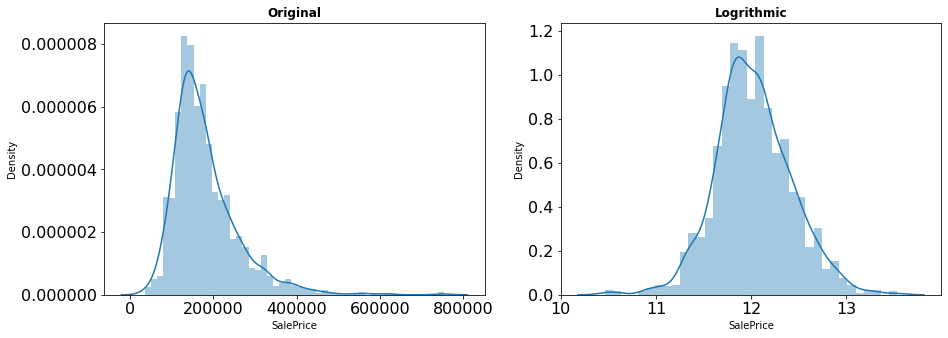

In [16]:
# Target variable data analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.distplot(surprise_housing_df[sale_price_column]).ticklabel_format(useOffset=False, style='plain')
plt.title("Original", weight='bold')

plt.subplot(1, 2, 2)
sns.distplot(np.log(surprise_housing_df[sale_price_column]))
plt.title("Logrithmic", weight='bold')

plt.show()

### Data Preparation

In [17]:
# Target column (transformed) name
converted_sale_price_column = "ConvertedSalePrice"

surprise_housing_num_df[converted_sale_price_column] = np.log(surprise_housing_num_df[sale_price_column])
surprise_housing_num_df[[sale_price_column, converted_sale_price_column]].head()

,SalePrice,ConvertedSalePrice
0,208500,12.247694
1,181500,12.109011
2,223500,12.317167
3,140000,11.849398
4,250000,12.429216


In [18]:
# Creating dummy variables for categorical variables
surprise_housing_dummies = pd.get_dummies(surprise_housing_obj_df, drop_first=True)
print("Shape", surprise_housing_dummies.shape)

surprise_housing_dummies.head()

Shape (1459, 223)


,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [19]:
# Making the final clean dataset to build the model 
surprise_housing_df=pd.concat([surprise_housing_num_df, surprise_housing_dummies],axis=1)
surprise_housing_df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0


In [20]:
# Scaling the numerical column
scaler = StandardScaler()

cols = list(surprise_housing_df.columns.values)
cols.remove(sale_price_column)
cols.remove(converted_sale_price_column)

surprise_housing_df[cols] = scaler.fit_transform(surprise_housing_df[cols])
surprise_housing_df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073732,-0.207125,0.650852,-0.517424,1.051899,0.879449,0.513594,0.574748,-0.28876,-0.944607,...,-0.058641,-0.058641,-0.302075,-0.045392,0.390447,-0.052432,-0.091066,-0.117892,0.467847,-0.30611
1,-0.871979,-0.091909,-0.072372,2.178727,0.157540,-0.428864,-0.571009,1.171304,-0.28876,-0.641330,...,-0.058641,-0.058641,-0.302075,-0.045392,0.390447,-0.052432,-0.091066,-0.117892,0.467847,-0.30611
2,0.073732,0.073401,0.650852,-0.517424,0.985650,0.830993,0.325449,0.092239,-0.28876,-0.301842,...,-0.058641,-0.058641,-0.302075,-0.045392,0.390447,-0.052432,-0.091066,-0.117892,0.467847,-0.30611
3,0.310159,-0.096918,0.650852,-0.517424,-1.863050,-0.719600,-0.571009,-0.499931,-0.28876,-0.061936,...,-0.058641,-0.058641,-0.302075,-0.045392,0.390447,-0.052432,-0.091066,-0.117892,-2.137452,-0.30611
4,0.073732,0.374967,1.374077,-0.517424,0.952526,0.734081,1.365783,0.462893,-0.28876,-0.175099,...,-0.058641,-0.058641,-0.302075,-0.045392,0.390447,-0.052432,-0.091066,-0.117892,0.467847,-0.30611


### Model Building

In [21]:
X = surprise_housing_df.drop([sale_price_column, converted_sale_price_column], axis=1).values
y = surprise_housing_df[converted_sale_price_column].values

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [22]:
# Applying Lasso
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'neg_mean_absolute_error', 
                        cv = folds, return_train_score=True, verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [23]:
# CV results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['params', 'mean_train_score', 'mean_test_score']].head()

,params,mean_train_score,mean_test_score
0,{'alpha': 0.0001},-0.060695,-0.099317
1,{'alpha': 0.001},-0.065047,-0.093138
2,{'alpha': 0.01},-0.084946,-0.097278
3,{'alpha': 0.05},-0.126283,-0.129044
4,{'alpha': 0.1},-0.164190,-0.166084


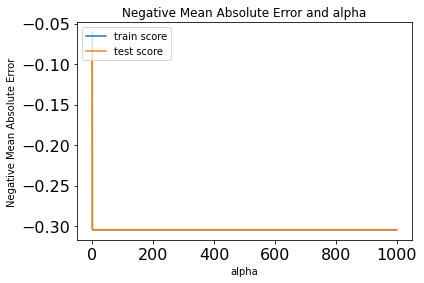

In [24]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [25]:
# Best alpha value
model_cv.best_params_

{'alpha': 0.001}

In [26]:
# Lasso Model for best param
lasso = Lasso(alpha=model_cv.best_params_['alpha'])
lasso.fit(X_train, y_train)

y_pred_lasso_train=lasso.predict(X_train)
print('Train R2 Square : ', round(r2_score(y_train, y_pred_lasso_train),2))

y_pred_lasso_test=lasso.predict(X_test)
print('Test R2 Square : ', round(r2_score(y_test, y_pred_lasso_test),2))

Train R2 Square :  0.94
Test R2 Square :  0.87


In [27]:
# Lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = surprise_housing_df.columns
cols = cols.insert(0, "constant")
var_coeff = [x for x in list(zip(cols, model_parameters)) if abs(x[-1] != 0)]
lasso_params = pd.DataFrame({'Feature':list(list(zip(*var_coeff))[0]),'Coeff':list(list(zip(*var_coeff))[1])})
lasso_params.reindex(lasso_params.Coeff.abs().sort_values(ascending = False).index)

,Feature,Coeff
0,constant,12.023
26,PoolArea,0.220
152,PoolQC_Fa,0.199
13,GrLivArea,0.111
151,PavedDrive_Y,-0.070
...,...,...
115,BsmtCond_TA,-0.001
120,BsmtFinType1_LwQ,-0.001
132,Electrical_FuseP,-0.001
44,LandSlope_Mod,-0.001


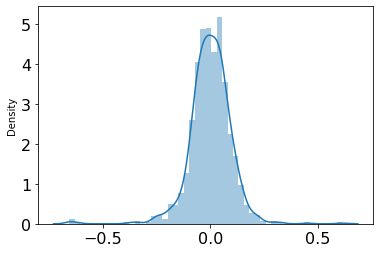

In [28]:
sns.distplot((y_train-y_pred_lasso_train))
plt.show()

In [29]:
# Applying Ridge
ridge = Ridge()

# Cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'neg_mean_absolute_error', 
                        cv = folds, return_train_score=True, verbose = 1)    

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [30]:
# CV results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['params', 'mean_train_score', 'mean_test_score']].head()

,params,mean_train_score,mean_test_score
0,{'alpha': 0.0001},-0.060082,-0.103524
1,{'alpha': 0.001},-0.060082,-0.103521
2,{'alpha': 0.01},-0.060084,-0.103493
3,{'alpha': 0.05},-0.060095,-0.103392
4,{'alpha': 0.1},-0.060112,-0.103273


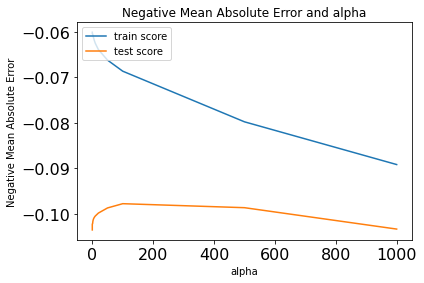

In [31]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [32]:
# Best alpha value
model_cv.best_params_

{'alpha': 100}

In [33]:
# Ridge Model for best param
ridge = Ridge(alpha=model_cv.best_params_['alpha'])
ridge.fit(X_train, y_train)

y_pred_ridge_train=ridge.predict(X_train)
print('Train R2 Square : ', round(r2_score(y_train, y_pred_ridge_train),2))

y_pred_ridge_test=ridge.predict(X_test)
print('Test R2 Square : ', round(r2_score(y_test, y_pred_ridge_test),2))

Train R2 Square :  0.93
Test R2 Square :  0.88


In [34]:
# Ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = surprise_housing_df.columns
cols = cols.insert(0, "constant")
var_coeff = [x for x in list(zip(cols, model_parameters)) if abs(x[-1] != 0)]
ridge_params = pd.DataFrame({'Feature':list(list(zip(*var_coeff))[0]),'Coeff':list(list(zip(*var_coeff))[1])})
ridge_params.reindex(ridge_params.Coeff.abs().sort_values(ascending = False).index)

,Feature,Coeff
0,constant,12.023
3,OverallQual,0.054
14,GrLivArea,0.044
215,PavedDrive_Y,-0.036
4,OverallCond,0.033
...,...,...
111,Exterior1st_BrkComm,-0.001
196,FireplaceQu_TA,0.001
201,GarageType_None,-0.001
197,GarageType_Attchd,0.001


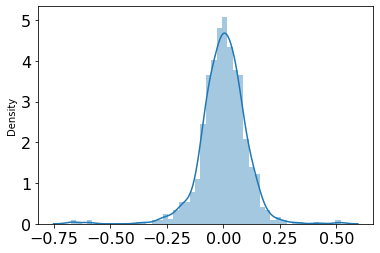

In [35]:
sns.distplot((y_train-y_pred_ridge_train))
plt.show()